## 데이터 전처리

- 데이터를 분석하기 좋은 형태로 만드는 과정
    - 데이터 품질을 결정하게 됨 - 데이터 품질은 분석 결과 품질의 출발점
    
- 전처리의 필요성
    - 데이터 품질이 높은 경우에도 전처리 필요
        - 구조적 형태가 분석 목적에 적합하지 않은 경우
        - 사용하는 기법(모델)에서 요구하는 데이터 형태가 다를 수 있음
        - 데이터가 너무 많은 경우
        - 데이터 분석의 레벨이 데이터 저장 레벨과 다른 경우
        
    - 데이터 품질을 낮추는 요인
        - 불완전(incomplete) : 데이터 필드가 비어있는 겨우
        - 잡음(noise) : 데이터에 오류가 포함된 경우
        - 모순(inconsistency) : 일관성이 결여된 경우 (데이터 분석이 이루어져야 확인 가능)

### 데이터 전처리 주요 기법
- 데이터 정제
    - 결측치, 이상치, 잡음


- 데이터 결합


- 데이터 변환
    - Normalization, scaling


- 차원 축소
    - Feature selection
        - filter, wrapper, embedded
    - Feature extraction
        - PCA, SVD, FA, NMF


### 결측값(missing value) 처리

- 완전 제거법 : 해당 데이터 행을 모두 제거
- 수작업으로 채워넣기
    - 특정값 사용 (평균, 0)
    - 핫덱(hot-deck) 대체법
        - 동일한 조사에서 다른 관측갑으로 부터 얻은 자료를 이용해 대체
        - 관측값중 결측치와 비슷한 특성르 가진 것을 무작위로 추출해서 대체
    - 가장 가능성이 높은 값을 사용 (회귀분석, 보간법 등)

### 문자열 데이터 -> 데이터 인코딩

- 문자열을 숫자형으로 변환

- 인코딩 방식
    - 레이블 인코딩
    - 원-핫 인코딩
    
    
#### 레이브 인코딩
- 문자열 데이터를 숫자로 코드화
- 범주형 자료의 수치화

- 상품분류 : TV, 냉장고, 전자렌지
- 상품분류 : 0, 1, 2


#### 사이킷런의 레이블 인코딩 클래스 : LabelEncoder

1. LabelEncode 객체 생성
2. fit() 메서드
    - 레이블 인코더를 구성
3. transform() 메서드
    - 최종변환 후 인코딩된 레이블 반환

In [11]:
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

In [4]:
from sklearn.preprocessing import LabelEncoder

items = ['TV', '냉장고', '전자렌지', '컴퓨터', '선풍기', '믹서', '믹서']

#LabelEncode 객체 생성
encoder = LabelEncoder()

#fit()
encoder.fit(items)

#transform()
labels = encoder.transform(items) # 정렬해서 데이터를 만들어 줌

print('인코딩 변환값 ', labels)

#LabelEncode 객체의 classes_ : 인코딩된 문자열 값 목록 확인
print('인코딩 클래스 ', encoder.classes_)

인코딩 변환값  [0 1 4 5 3 2 2]
인코딩 클래스  ['TV' '냉장고' '믹서' '선풍기' '전자렌지' '컴퓨터']


#### inverse_transform() : 인코딩된 값을 다시 디코딩

In [5]:
encoder.inverse_transform([3,0,2,1])# dtype='<U4' : uint32

array(['선풍기', 'TV', '믹서', '냉장고'], dtype='<U4')

### 레이블 인코딩 시 주의
- 인코딩된 결과는 문자열 값을 숫자형 값으로 변환하지만 다순 코드일 뿐 크기와 상관없음
- ML 알고리즘에 따라 이를 적용할 경우 예측 성능이 떨어지는 경우 발생
    - 숫자의 크기 (가중치) 의미가 없음에도 불구하고 크기 특성이 적용될 수 있음
    - 가중치가 부여되거나 더 중요하게 인식돌 수 있음
    - 선현회귀 같은 알고리즘에서는 적용하면 안됨 (특성을 추가해서 사용해야 함)
    - 트리계열 알고리즘은 숫자의 크기 특성을 반영하지 않으므로 레이블 인코딕 적용시 문제 없음

### 원-핫 인코딩(one-hot encoding)



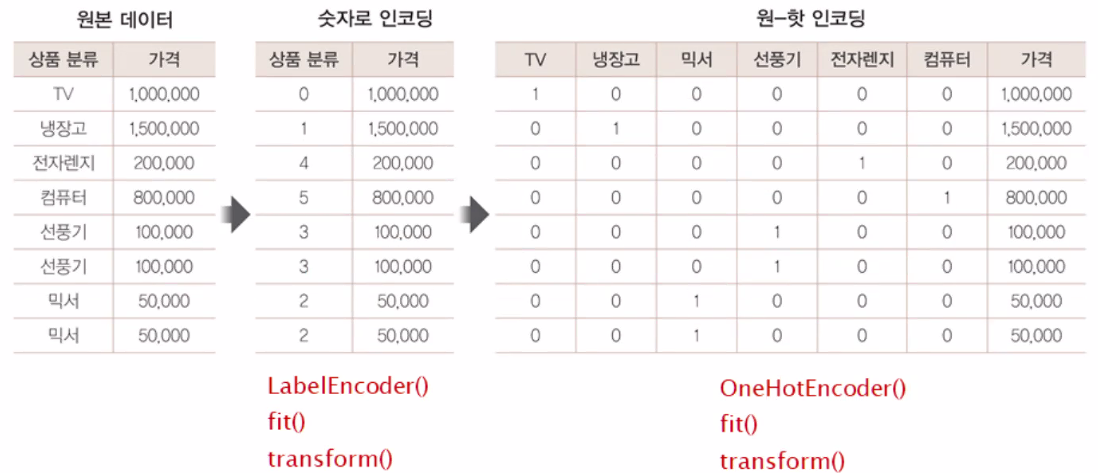

**사이킷런에서 원-핫 인코딩 클래스 : OneHotEncoder**

**원-핫 인코딩 변환 과정**
1. 문자열 값을 숫자형 값으로 변환
2. 입력 값을 2차원 데이터로 변환
3. OneHotEncoder 클래스로 원-핫 인코딩 적용
    - fit()
    - transform()


In [7]:
from sklearn.preprocessing import LabelEncoder

items = ['TV', '냉장고', '전자렌지', '컴퓨터', '선풍기', '믹서', '믹서']


#1. 문자열 값을 숫자형 값으로 변환
#LabelEncode 객체 생성
encoder = LabelEncoder()

#fit()
encoder.fit(items)

#transform()
labels = encoder.transform(items) # 정렬해서 데이터를 만들어 줌

print('인코딩 변환값 ', labels)

#LabelEncode 객체의 classes_ : 인코딩된 문자열 값 목록 확인
print('인코딩 클래스 ', encoder.classes_)

인코딩 변환값  [0 1 4 5 3 2 2]
인코딩 클래스  ['TV' '냉장고' '믹서' '선풍기' '전자렌지' '컴퓨터']


In [12]:
# 2. 입력 값을 2차원 데이터로 변환
labels = labels.reshape(-1,1) # -1 : 뒤에 숫자에 맞춰서 자동 생성 /  1: 컬럼수 의미
labels


# 10개의 데이터 : reshape(-1,5) - 2행 5열로 변환

array([[0],
       [1],
       [4],
       [5],
       [3],
       [2],
       [2]])

In [17]:
from sklearn.preprocessing import OneHotEncoder

# 3. OneHotEncoder 클래스로 원-핫 인코딩 적용
one_encoder = OneHotEncoder()
one_encoder.fit(labels)
one_labels = one_encoder.transform(labels)
one_labels

OneHotEncoder()

<7x6 sparse matrix of type '<class 'numpy.float64'>'
	with 7 stored elements in Compressed Sparse Row format>

In [19]:
print(one_labels) # 1 값 위치 추력

  (0, 0)	1.0
  (1, 1)	1.0
  (2, 4)	1.0
  (3, 5)	1.0
  (4, 3)	1.0
  (5, 2)	1.0
  (6, 2)	1.0


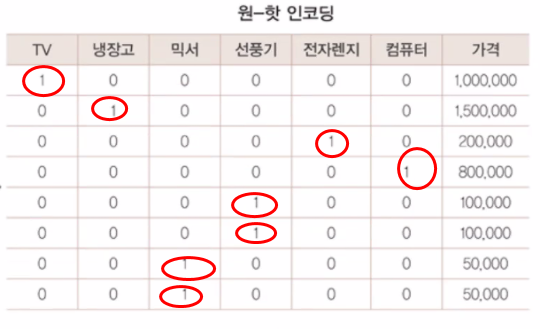

In [23]:
# 2차원 형태로 출력
print(one_labels.shape)
print(one_labels.toarray())

(7, 6)
[[1. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0.]
 [0. 0. 0. 0. 1. 0.]
 [0. 0. 0. 0. 0. 1.]
 [0. 0. 0. 1. 0. 0.]
 [0. 0. 1. 0. 0. 0.]
 [0. 0. 1. 0. 0. 0.]]


In [22]:
# 원-핫 인코딩 전체 과정

from sklearn.preprocessing import OneHotEncoder, LabelEncoder
import numpy as np

items=['TV','냉장고','전자렌지','컴퓨터','선풍기','선풍기','믹서','믹서']

# 1. 먼저 숫자값으로 변환을 위해 LabelEncoder로 변환 
encoder = LabelEncoder()
encoder.fit(items)
labels = encoder.transform(items)

# 2. 2차원 데이터로 변환합니다. 
labels = labels.reshape(-1,1)

# 3. 원-핫 인코딩을 적용합니다. 
oh_encoder = OneHotEncoder()
oh_encoder.fit(labels)
oh_labels = oh_encoder.transform(labels)

print('원-핫 인코딩 데이터')
print(oh_labels.toarray())
print('원-핫 인코딩 데이터 차원')
print(oh_labels.shape)


LabelEncoder()

OneHotEncoder()

원-핫 인코딩 데이터
[[1. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0.]
 [0. 0. 0. 0. 1. 0.]
 [0. 0. 0. 0. 0. 1.]
 [0. 0. 0. 1. 0. 0.]
 [0. 0. 0. 1. 0. 0.]
 [0. 0. 1. 0. 0. 0.]
 [0. 0. 1. 0. 0. 0.]]
원-핫 인코딩 데이터 차원
(8, 6)


### Pandas API 사용 원-핫 인코딩 수행
- get_dummies() 메서드 사용
- 숫자형으로 변환없이 바로 변환

In [24]:
import pandas as pd

df = pd.DataFrame({'item':['TV','냉장고','전자렌지','컴퓨터','선풍기','선풍기','믹서','믹서']})
df


,item
0,TV
1,냉장고
2,전자렌지
3,컴퓨터
4,선풍기
5,선풍기
6,믹서
7,믹서


In [26]:
pd.get_dummies(df)

,item_TV,item_냉장고,item_믹서,item_선풍기,item_전자렌지,item_컴퓨터
0,1,0,0,0,0,0
1,0,1,0,0,0,0
2,0,0,0,0,1,0
3,0,0,0,0,0,1
4,0,0,0,1,0,0
5,0,0,0,1,0,0
6,0,0,1,0,0,0
7,0,0,1,0,0,0


In [27]:
# df를 np의 배열로 변환
pd.get_dummies(df).to_numpy()

array([[1, 0, 0, 0, 0, 0],
       [0, 1, 0, 0, 0, 0],
       [0, 0, 0, 0, 1, 0],
       [0, 0, 0, 0, 0, 1],
       [0, 0, 0, 1, 0, 0],
       [0, 0, 0, 1, 0, 0],
       [0, 0, 1, 0, 0, 0],
       [0, 0, 1, 0, 0, 0]], dtype=uint8)

### 피처 스케일링과 정규화

- 피처 스케일링(feature scaling)
    - 서로 다른 변수의 값 범위를 일정한 수준으로 맞춤


- 방식
    - Z-scaling
        - 표준화(standardization)
        - 평균이 0이고 분산이 1인 가우지안 정규분포로 변환
        - 정규화(Normalization)
        - sklearn.preprocessing의  StandardScaler 모듈

    - Min-max
        -  0~1로 변환
        - sklearn.preprocessing의  MinMaxScaler 모듈

    - 벡터 정규화
        - Sklearn의 Nomalizer 모듈
        - 선형대수의 정규화 개념
        - 개별 벡터의 크기를 맞추기 위해 모든 피처벡터의 크기로 나누어 변환


## 사전에 표준화를 적용해야 하는 알고리즘
- SVM
- 선형회귀
- 로지스틱 회귀

### StandardScaler

- 표준화 지원 클래스
- 개별 피처를 평균이 0이고 분산이 1인 값으로 변환

- 일반적인 의미의 표준화 정규화 : 피처스케일링
- 선형대수 개념의 정규화 : 벡터 정규화

In [29]:
from sklearn.datasets import load_iris
import pandas as pd
# 붓꽃 데이터 셋을 로딩하고 DataFrame으로 변환
iris = load_iris()
iris_data = iris.data
iris_df = pd.DataFrame(data=iris_data, columns=iris.feature_names)

print('feature 들의 평균 값')
print(iris_df.mean())
print('\nfeature 들의 분산 값')
print(iris_df.var())


feature 들의 평균 값
sepal length (cm)    5.843333
sepal width (cm)     3.057333
petal length (cm)    3.758000
petal width (cm)     1.199333
dtype: float64

feature 들의 분산 값
sepal length (cm)    0.685694
sepal width (cm)     0.189979
petal length (cm)    3.116278
petal width (cm)     0.581006
dtype: float64


StandardScaler 이용 표준화해서 변환
1.  StandardScaler 객체 생성
2. fit() : 데이터 변환을 위한 기준 정보 설정
3. transform() : fit()에서 설정된 정보를 이용해 데이터 변환
    - scale 변환된 데이터 셋이 numpy ndarry로 반환


In [37]:
# StandardScaler 이용 표준화해서 변환

from sklearn.preprocessing import StandardScaler

# StandardScaler 객체 생성
scaler = StandardScaler()

# fit() : 데이터 변환을 위한 기준 정보 설정
scaler.fit(iris_df)

# fit()에서 설정된 정보를 이용해 데이터 변환 
iris_scaled = scaler.transform(iris_df)

# numpy ndarry를 DataFrame으로 변환
iris_df_scaled = pd.DataFrame(data=iris_scaled, columns=iris.feature_names)


print('feature 들의 평균 값')
print(iris_df_scaled.mean())
print('\nfeature 들의 분산 값')
print(iris_df_scaled.var())

# 모든 컬럼 값의 평균이 0에 가까운 분산이 1에 가까운 값으로 변환


StandardScaler()

feature 들의 평균 값
sepal length (cm)   -1.690315e-15
sepal width (cm)    -1.842970e-15
petal length (cm)   -1.698641e-15
petal width (cm)    -1.409243e-15
dtype: float64

feature 들의 분산 값
sepal length (cm)    1.006711
sepal width (cm)     1.006711
petal length (cm)    1.006711
petal width (cm)     1.006711
dtype: float64


In [38]:
iris_df_scaled

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,-0.900681,1.019004,-1.340227,-1.315444
1,-1.143017,-0.131979,-1.340227,-1.315444
2,-1.385353,0.328414,-1.397064,-1.315444
3,-1.506521,0.098217,-1.283389,-1.315444
4,-1.021849,1.249201,-1.340227,-1.315444
...,...,...,...,...
145,1.038005,-0.131979,0.819596,1.448832
146,0.553333,-1.282963,0.705921,0.922303
147,0.795669,-0.131979,0.819596,1.053935
148,0.432165,0.788808,0.933271,1.448832


MinMaxScaler
* 데이터값을 0과 1사이의 범위 값으로 변환
* 음수인 경우 -1에서 1사이의 값으로 변환
* 데이터의 분포가 가우시안 분포가 아닌 경우 Min, Max Scale 적용 가능


MinMaxScaler 이용 변환
1. MinMaxScaler 객체 생성
2. fit()
3. transform() : scale 변환된 데이터 셋이 numpy ndarry로 반환


In [39]:
from sklearn.preprocessing import MinMaxScaler

# MinMaxScaler객체 생성
scaler = MinMaxScaler()
# MinMaxScaler 로 데이터 셋 변환. fit() 과 transform() 호출.  
scaler.fit(iris_df)
iris_scaled = scaler.transform(iris_df) # numpy ndarry로 반환

# numpy ndarry를 DataFrame으로 변환
iris_df_scaled = pd.DataFrame(data=iris_scaled, columns=iris.feature_names)
print('feature들의 최소 값')
print(iris_df_scaled.min())
print('\nfeature들의 최대 값')
print(iris_df_scaled.max())


MinMaxScaler()

feature들의 최소 값
sepal length (cm)    0.0
sepal width (cm)     0.0
petal length (cm)    0.0
petal width (cm)     0.0
dtype: float64

feature들의 최대 값
sepal length (cm)    1.0
sepal width (cm)     1.0
petal length (cm)    1.0
petal width (cm)     1.0
dtype: float64


In [41]:
iris_df_scaled

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,0.222222,0.625000,0.067797,0.041667
1,0.166667,0.416667,0.067797,0.041667
2,0.111111,0.500000,0.050847,0.041667
3,0.083333,0.458333,0.084746,0.041667
4,0.194444,0.666667,0.067797,0.041667
...,...,...,...,...
145,0.666667,0.416667,0.711864,0.916667
146,0.555556,0.208333,0.677966,0.750000
147,0.611111,0.416667,0.711864,0.791667
148,0.527778,0.583333,0.745763,0.916667


**fit하고 transform 동시에**

In [43]:
# StandardScaler에서 fit_transform() 이용

from sklearn.preprocessing import StandardScaler

# StandardScaler객체 생성
scaler = StandardScaler()
# StandardScaler 로 데이터 셋 변환. fit_transform() 호출.  
iris_scaled = scaler.fit_transform(iris_df)# numpy ndarry로 반환

# numpy ndarry를 DataFrame으로 변환
iris_df_scaled = pd.DataFrame(data=iris_scaled, columns=iris.feature_names)
print('feature 들의 평균 값')
print(iris_df_scaled.mean())
print('\nfeature 들의 분산 값')
print(iris_df_scaled.var())


feature 들의 평균 값
sepal length (cm)   -1.690315e-15
sepal width (cm)    -1.842970e-15
petal length (cm)   -1.698641e-15
petal width (cm)    -1.409243e-15
dtype: float64

feature 들의 분산 값
sepal length (cm)    1.006711
sepal width (cm)     1.006711
petal length (cm)    1.006711
petal width (cm)     1.006711
dtype: float64


In [44]:
iris_df_scaled

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,-0.900681,1.019004,-1.340227,-1.315444
1,-1.143017,-0.131979,-1.340227,-1.315444
2,-1.385353,0.328414,-1.397064,-1.315444
3,-1.506521,0.098217,-1.283389,-1.315444
4,-1.021849,1.249201,-1.340227,-1.315444
...,...,...,...,...
145,1.038005,-0.131979,0.819596,1.448832
146,0.553333,-1.282963,0.705921,0.922303
147,0.795669,-0.131979,0.819596,1.053935
148,0.432165,0.788808,0.933271,1.448832


In [45]:
# MinMaxScaler에서 fit_transform() 사용

from sklearn.preprocessing import MinMaxScaler

# MinMaxScaler객체 생성
scaler = MinMaxScaler()
# MinMaxScaler 로 데이터 셋 변환. fit_transform() 호출.  
iris_scaled = scaler.fit_transform(iris_df)# numpy ndarry로 반환

# numpy ndarry를 DataFrame으로 변환
iris_df_scaled = pd.DataFrame(data=iris_scaled, columns=iris.feature_names)
print('feature들의 최소 값')
print(iris_df_scaled.min())
print('\nfeature들의 최대 값')
print(iris_df_scaled.max())

# 모든 피처가 0 ~ 1 값으로 변환됨
# 결과 동일


feature들의 최소 값
sepal length (cm)    0.0
sepal width (cm)     0.0
petal length (cm)    0.0
petal width (cm)     0.0
dtype: float64

feature들의 최대 값
sepal length (cm)    1.0
sepal width (cm)     1.0
petal length (cm)    1.0
petal width (cm)     1.0
dtype: float64


In [46]:
iris_df_scaled

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,0.222222,0.625000,0.067797,0.041667
1,0.166667,0.416667,0.067797,0.041667
2,0.111111,0.500000,0.050847,0.041667
3,0.083333,0.458333,0.084746,0.041667
4,0.194444,0.666667,0.067797,0.041667
...,...,...,...,...
145,0.666667,0.416667,0.711864,0.916667
146,0.555556,0.208333,0.677966,0.750000
147,0.611111,0.416667,0.711864,0.791667
148,0.527778,0.583333,0.745763,0.916667


#### 학습 데이터와 테스트 데이터의 스케일링 변환시 주의점
- 학습 데이터와 테스트 데이터의 스케일링 기준 정보가 달라지지 않게 주의
- 머신러닝 모델은 학습데이터를 기반으로 학습되기 때문에 모든 기준이 학습 데이터 맞춰짐
- 테스트도 동일한 스케일링 변환 후 테스트를 해야 함

- 학습데이터 fit()과 transform을 적용했다면
    - 테스트 데이터는 fit() 적용 없이 학습 데이터에서 사용한 객체를 이용해 transform()으로 변환해야 함

- 정리 -



스케일링시 )). fit(학습데이터) - transform(학습데이터) - transform(테스트데이터)
